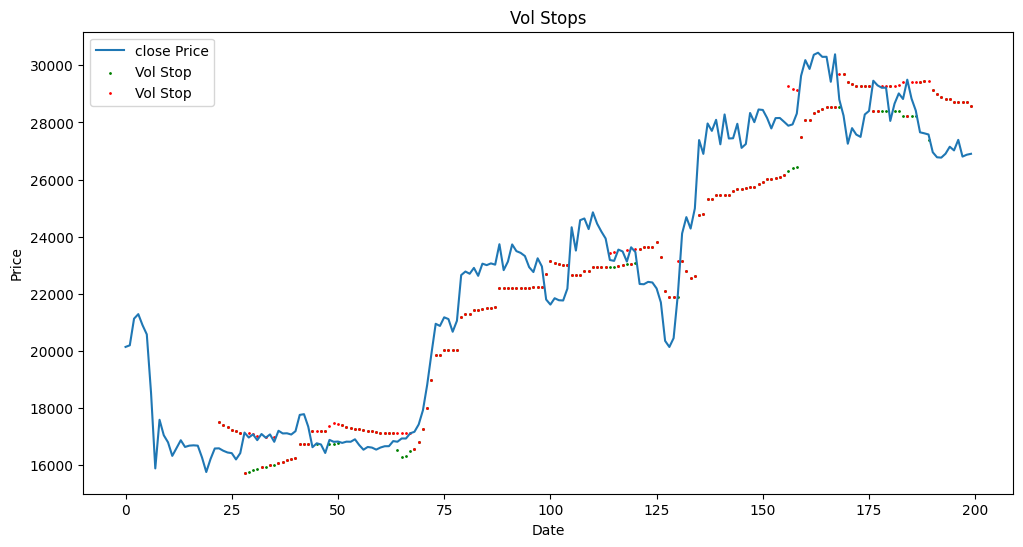

In [11]:
#Using custom Chande Kross Indicator (uses closes instead of the highest high and lowest low 
import ccxt
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
import numpy as np
from Chande_Kroll_with_closes import cksp
exchange = ccxt.bybit()
bars = exchange.fetch_ohlcv('BTCUSDT',timeframe="D", limit=500)
ccxt_df = pd.DataFrame(bars, columns=['time', 'open', 'high', 'low', 'close', 'volume'])

chande_kroll_stop = cksp(ccxt_df['high'], ccxt_df['low'], ccxt_df['close'], p=14, x=2, q=9, tvmode=True, offset=None)
ccxt_df['CKSP_longs'] = chande_kroll_stop['CKSPl_14_2.0_9']
ccxt_df['CKSP_shorts'] = chande_kroll_stop['CKSPs_14_2.0_9']

#now to determine if uptrend to decide which one to use
# ccxt_df['switch'] = np.where((ccxt_df['CKSP_longs'] > ccxt_df['CKSP_shorts']), ccxt_df['CKSP_longs'], ccxt_df['CKSP_shorts'])
ccxt_df['vol_stop_longs'] = np.where(ccxt_df['CKSP_longs'] < ccxt_df['close'], ccxt_df['CKSP_longs'], ccxt_df['CKSP_shorts'])
# ccxt_df['vol_stop_shorts'] = np.where(ccxt_df['CKSP_shorts'] > ccxt_df['close'], ccxt_df['CKSP_shorts'], ccxt_df['CKSP_longs'])

plt.figure(figsize=(12, 6))
plt.plot(ccxt_df.index, ccxt_df['close'], label='close Price')
plt.scatter(ccxt_df.index, ccxt_df['vol_stop_longs'], label="Vol Stop", color='green',s = 1)
# plt.scatter(ccxt_df.index, ccxt_df['vol_stop_shorts'], label="Vol Stop", color='red',s = 1)
# plt.scatter(ccxt_df.index, ccxt_df['switch'], label="Vol Stop", color='red',s = 1)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Vol Stops")
plt.legend()
plt.show()

In [ ]:
#Using Pandas_TA official Chande Kross Indicator
import pandas_ta as ta
import ccxt
import pandas as pd
import matplotlib.pyplot as plt

exchange = ccxt.bybit()
bars = exchange.fetch_ohlcv('BTCUSDT',timeframe="D", limit=200)
ccxt_df = pd.DataFrame(bars, columns=['time', 'open', 'high', 'low', 'close', 'volume'])

# atr = ccxt_df.ta.atr(length=14, scaler=2)
# ccxt_df['ATR'] = atr
# vol_stop_multiple = 2
# ccxt_df['Stop_Distance'] = ccxt_df['ATR'] * vol_stop_multiple
# #need to determine if price is in an uptrend
# ccxt_df['Uptrend'] = 1


# Calculate Chande Kroll's Stop
chande_kroll_stop = ta.cksp(ccxt_df['high'], ccxt_df['low'], ccxt_df['close'], p=14, x=2, q=9, tvmode=True, offset=None)
ccxt_df['CKSP_longs'] = chande_kroll_stop['CKSPl_14_2.0_9']
ccxt_df['CKSP_shorts'] = chande_kroll_stop['CKSPs_14_2.0_9']

plt.figure(figsize=(12, 6))
plt.plot(ccxt_df.index, ccxt_df['close'], label='close Price')
#plt.scatter(df.index, df['stop'], label="Volatility Stop", color='green',s = 1)
#plt.scatter(ccxt_df.index, ccxt_df['CKSP_longs'], label="Chande Kroll Stop", color='green',s = 1)
plt.scatter(ccxt_df.index, ccxt_df['CKSP_shorts'], label="Chande Kroll Stop", color='red',s = 1)
#df['stop'].plot(label = 'stops', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Vol Stops")
plt.legend()
plt.show()
